In [41]:
# Note in Colab you can type "pip install" directly in the notebook
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


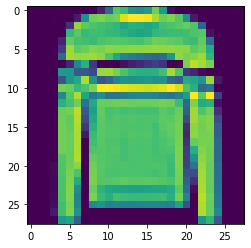

In [42]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [4]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [5]:
model = tf.keras.Sequential()

# # Must define the input shape in the first layer of the neural network
# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
# model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# model.add(tf.keras.layers.Dropout(0.3))

# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# model.add(tf.keras.layers.Dropout(0.3))

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(256, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Convolution layer with 64 filters, each 3x3, stride of 1 (i.e., apply the filter at all pixel locations),
# no padding.
# • Max pool with a pooling width of 2x2, stride of 2, no padding.
# • ReLU.
# • Flatten the 64 feature maps into one long vector.
# • Fully-connected layer to map into a 1024-dimensional vector.
# • ReLU.
# • Fully-connected layer to map into a 10-dimensional vector.
# • Softmax.

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='valid', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(tf.keras.layers.Activation(activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
activation (Activation)      (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              11076608  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 11,087,498
Trainable params: 11,087,498
Non-trainable params: 0
____________________________________________

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
          y_train,
          batch_size=32,
          epochs=1,
          validation_data=(x_valid, y_valid),
          callbacks=[checkpointer])

1719/1719 [==============================] - 245s 142ms/step - loss: 0.4852 - accuracy: 0.8272 - val_loss: 0.2720 - val_accuracy: 0.8976

Epoch 00001: val_loss improved from inf to 0.27204, saving model to model.weights.best.hdf5


In [9]:
#Load the weights with the best validation accuracy.
model.load_weights('model.weights.best.hdf5')

In [10]:
import h5py
f = h5py.File('model.weights.best.hdf5', 'r')

In [12]:
base_items = list(f.items())
print(base_items)

[('model_weights', <HDF5 group "/model_weights" (6 members)>), ('optimizer_weights', <HDF5 group "/optimizer_weights" (1 members)>)]


In [13]:
model_weights = f.get('model_weights')
model_weights_items = list(model_weights.items())
print(model_weights_items)

[('activation', <HDF5 group "/model_weights/activation" (0 members)>), ('conv2d', <HDF5 group "/model_weights/conv2d" (1 members)>), ('dense', <HDF5 group "/model_weights/dense" (1 members)>), ('dense_1', <HDF5 group "/model_weights/dense_1" (1 members)>), ('flatten', <HDF5 group "/model_weights/flatten" (0 members)>), ('max_pooling2d', <HDF5 group "/model_weights/max_pooling2d" (0 members)>)]


In [18]:
conv2d = model_weights.get('conv2d')
conv2d_items = list(conv2d.items())
print(conv2d_items)

Conv2d = conv2d.get('conv2d')
Conv2d_items = list(Conv2d.items())
print(Conv2d_items)

bias_conv2d = np.array(Conv2d.get('bias:0'))
print(bias_conv2d)

kernel_conv2d = np.array(Conv2d.get('kernel:0'))
print(kernel_conv2d)

[('conv2d', <HDF5 group "/model_weights/conv2d/conv2d" (2 members)>)]
[('bias:0', <HDF5 dataset "bias:0": shape (64,), type "<f4">), ('kernel:0', <HDF5 dataset "kernel:0": shape (3, 3, 1, 64), type "<f4">)]
[-6.0230726e-03 -1.4200043e-02 -4.8372624e-03 -6.2475866e-03
 -6.5414547e-03 -5.8234669e-03  6.2208645e-02 -1.0642447e-02
 -9.1434997e-03 -1.7471189e-02 -2.1600636e-02 -2.7356874e-03
 -5.7792000e-05  2.8939755e-03  1.7337792e-03 -1.7745651e-02
 -4.0415702e-03 -1.7138767e-03 -4.1316054e-03  1.2797613e-03
 -6.2939865e-03  5.3490582e-03 -3.9840071e-03 -4.3348372e-03
 -2.2111009e-03 -7.1348841e-03 -1.4649658e-02  9.4642537e-03
  1.2449228e-03 -4.5649740e-03 -1.8985198e-04  6.3069570e-03
 -5.9699537e-03  7.9180516e-04 -1.6276170e-03 -1.1379577e-03
  3.3766308e-03 -1.6651554e-03 -2.9980443e-02 -3.1695713e-03
 -1.9235054e-02 -8.1741164e-04 -1.1923295e-02 -9.5210801e-04
 -8.0147089e-04 -3.2621382e-03  4.9838731e-03 -5.1911399e-03
 -1.2826840e-02 -3.6526434e-03 -4.1565457e-03 -4.7839377e-03


In [25]:
dense = model_weights.get('dense')
dense_items = list(dense.items())
print(dense_items)

Dense = dense.get('dense')
Dense_items = list(Dense.items())
print(Dense_items)

bias_dense = np.array(Dense.get('bias:0'))
print(bias_dense)

kernel_dense = np.array(Dense.get('kernel:0'))
print(kernel_dense)

[('dense', <HDF5 group "/model_weights/dense/dense" (2 members)>)]
[('bias:0', <HDF5 dataset "bias:0": shape (1024,), type "<f4">), ('kernel:0', <HDF5 dataset "kernel:0": shape (10816, 1024), type "<f4">)]
[ 0.00327816 -0.00599689 -0.00881026 ... -0.00600461 -0.0073046
  0.02039265]
[[ 0.00412775  0.01856545 -0.02094681 ...  0.01095871 -0.01403567
   0.08044033]
 [-0.00381395 -0.01045534 -0.00267088 ...  0.00780747 -0.03007658
   0.06136779]
 [-0.00344451 -0.00850277 -0.00449993 ...  0.01407677 -0.03775979
   0.01840823]
 ...
 [-0.00122815  0.01327485  0.01202555 ...  0.01736874  0.00453045
   0.0017971 ]
 [ 0.00841594 -0.00872981  0.02197489 ... -0.01781288 -0.02515421
  -0.01535787]
 [ 0.04487487  0.02148779 -0.02051701 ... -0.00243073  0.0146882
   0.025553  ]]


In [26]:
dense_1 = model_weights.get('dense_1')
dense_1_items = list(dense_1.items())
print(dense_1_items)

Dense_1 = dense_1.get('dense_1')
Dense_1_items = list(Dense_1.items())
print(Dense_1_items)

bias_dense_1 = np.array(Dense_1.get('bias:0'))
print(bias_dense_1)

kernel_dense_1 = np.array(Dense_1.get('kernel:0'))
print(kernel_dense_1)

[('dense_1', <HDF5 group "/model_weights/dense_1/dense_1" (2 members)>)]
[('bias:0', <HDF5 dataset "bias:0": shape (10,), type "<f4">), ('kernel:0', <HDF5 dataset "kernel:0": shape (1024, 10), type "<f4">)]
[ 0.02498602 -0.02504676  0.02599131  0.00490885 -0.0278858  -0.01686559
 -0.00249491  0.02386236 -0.007708   -0.01269974]
[[-0.07972144 -0.10460409 -0.08362588 ...  0.04326078  0.04854307
   0.09100045]
 [-0.04001161  0.03760821  0.02455545 ... -0.00436404 -0.07282748
   0.06428409]
 [ 0.01611708 -0.00679435  0.0214432  ...  0.04410805 -0.03083324
   0.04418109]
 ...
 [ 0.05127913  0.04410839  0.05424841 ...  0.05020692  0.03486197
  -0.04464638]
 [-0.07385655 -0.04113129 -0.07565083 ...  0.02040754  0.09088379
   0.00673239]
 [ 0.02537308 -0.01556931  0.03646674 ... -0.13651483  0.0115251
  -0.2020048 ]]


In [53]:
W = kernel_conv2d
X_tr = x_train[5].reshape(784,1)
b1 = bias_conv2d


def conv2D(W, X, b):
    z = np.dot(W, X) +b
    return z




In [58]:
def maxpool(Z, width, stride):
    img_length = int(np.sqrt(len(Z)))                   #=26 in our case
    img = np.reshape(Z, [img_length, img_length])     #=13 in our case
    pooled_img_length = int(img_length/stride)

    Pooled_img = np.empty([pooled_img_length, pooled_img_length])
    for i in range(0, pooled_img_length):
        for j in range(0, pooled_img_length):
            pixels = np.array([img[i*width, j*width], img[i*width, (j*width)+1], img[(i*width)+1, j*width], img[(i*width)+1, (j*width)+1]])
            Pooled_img[i, j] = np.max(pixels)

    return Pooled_img


In [59]:
Kernels = {}
Wts_row = {}
WEIGHTS_CONV2D = {}
Z_CONV2D = {}
Z_MAXPOOL = {}

#print(W)
W1 = W[0, 0, 0, :]
W2 = W[0, 1, 0, :]
W3 = W[0, 2, 0, :]
W4 = W[1, 0, 0, :]
W5 = W[1, 1, 0, :]
W6 = W[1, 2, 0, :]
W7 = W[2, 0, 0, :]
W8 = W[2, 1, 0, :]
W9 = W[2, 2, 0, :]

for i in range(0, 64):
    Kernels['K'+str(i)] = [[W1[i], W2[i], W3[i]],
                           [W4[i], W5[i], W6[i]],
                           [W7[i], W8[i], W9[i]]]

# print(Kernels['K'+str(42)])

for i in range(0, 64):
    V = Kernels['K' + str(i)]
    Zeros = np.zeros(25)
    Wts_row['Wts' + str(i)] = np.concatenate([V[0], Zeros, V[1], Zeros, V[2]])

Wts_row_length = np.size(Wts_row['Wts' + str(56)])      #All 'weights' rows are of same length
# print('Length of weights row: ', Wts_row_length)

#Generates indices where kernel has to be applied to get feature maps
Nos = np.arange(784)
Nos = np.reshape(Nos, [28, 28])
Nos = Nos[:, :-2]
Nos = np.ndarray.flatten(Nos)
# print(Nos)

for j in range(0, 64):
    WEIGHTS_CONV2D['w_conv' + str(j)] = np.concatenate([Wts_row['Wts' + str(j)], np.zeros(784 - Wts_row_length)])
    for i in range(1, 676):
        INDEX = Nos[i]
        ROW = np.concatenate([np.zeros(INDEX), Wts_row['Wts' + str(j)], np.zeros(784 - Wts_row_length - INDEX)])
        WEIGHTS_CONV2D['w_conv' + str(j)] = np.vstack([WEIGHTS_CONV2D['w_conv' + str(j)], ROW])

# print(np.shape(WEIGHTS_CONV2D))
# plt.matshow(WEIGHTS/np.max(WEIGHTS))
# plt.show()

for i in range(0, 64):
    Wi = WEIGHTS_CONV2D['w_conv' + str(i)]
    Z_CONV2D['z_conv2d'+str(i)] = conv2D(Wi, X_tr, b1[i]) 

for i in range(0, 64):
    Z_MAXPOOL['z_maxpool'+str(i)] = maxpool(Z_CONV2D['z_conv2d'+str(i)], 2, 2)

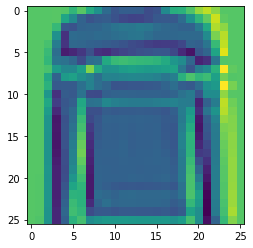

In [63]:
FEATURE_MAP = np.reshape(Z_CONV2D['z_conv2d'+str(33)], [26, 26])
plt.imshow(FEATURE_MAP)
plt.show()

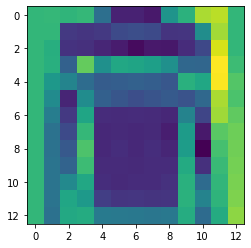

In [57]:
FEATURE_MAP_MAX_POOLING = np.reshape(Z_MAXPOOL['z_maxpool'+str(33)], [13, 13])
plt.imshow(FEATURE_MAP_MAX_POOLING)
plt.show()

In [64]:
Weight2 = kernel_dense
bias2 = bias_dense
Weight3 = kernel_dense_1
bias3 = bias_dense_1

In [68]:
def relu_function(z):
    h = np.maximum(z, 0)
    return h

def dense(H, W, b):
    z = np.dot(np.transpose(W), H) + b
    return z

def softmax(z):
  return np.exp(z - max(z))/np.sum(np.exp(z - max(z)), axis = 0, keepdims = True)

In [69]:
Z_RELU1={}

for i in range(0, 64):
    Z_RELU1['z_relu_one'+str(i)] = relu_function(Z_MAXPOOL['z_maxpool'+str(i)])

# print(np.shape(Z_RELU1['z_relu_one'+str(0)]))

Z_FLATTENED = np.ndarray.flatten(Z_RELU1['z_relu_one'+str(0)])
for i in range(1, 64):
    Z_FLATTENED = np.concatenate([Z_FLATTENED, np.ndarray.flatten( Z_RELU1['z_relu_one'+str(i)])])

# print(np.shape(Z_FLATTENED))
Z_DENSE1 = dense(Z_FLATTENED, Weight2, bias2)
Z_RELU2 = relu_function(Z_DENSE1)
Z_DENSE2 = dense(Z_RELU2, Weight3, bias3)
SOFTMAX = softmax(Z_DENSE2)

In [70]:
print(SOFTMAX)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
